# U21 Health Sciences Group 2024 Annual Meeting
---
**PLENAIRE SESSIE 2**\
Artificial Intelligence: Hervormen van de Gezondheidszorg met Large Language Models

**Hands-On Workshop**\
Betrouwbare generatieve AI: verbetering van routinematige zorg door toepassing van "Retrieval-Augmeted Generation" met klinische richtlijnen

---

💡 Voordat je begint:
1. Sla een kopie op van dit document op je eigen Google Drive via "**File**" > "**Save a copy in Drive**" en open deze kopie.
2. Deze code heeft een GPU (computer processor) om goed te kunnen werken. Check of de geselecteerde <font color='green'>GPU</font> staat ingesteld op T4 GPU. Dit kun je checken via het menu "**Runtime**" > "**Change runtime type**", verander daar de runtime en zorg dat T4 GPU geselecteerd staat.

---

# Navigeren door de Notebook

Momenteel heeft u een [Jupyter](https://jupyter.org/) notebook openstaan ​​dat gehost wordt op Google Colaboratory. In tegenstelling tot statische internet pagina's is deze omgeving interactief. Dit betekent dat u code kunt schrijven, aanpassen en uitvoeren in Python en andere talen. In het notebook dat u heeft open staan zijn de twee belangrijkste tekst-blokken die u tegenkomt:

* Informatieve tekst blokken: Geformatteerde tekst met informatie en uitleg van deze workshop. Deze blokken geven tekst netjes weer in het Notebook.
* Code blokken: Deze bevatten uitvoerbare code en hun uitvoer wordt direct hieronder weergegeven. Zo'n vak wordt gemarkeerd met een [ ] ervoor en heeft een andere lettertype uit dan de tekst blokken.

> De inhoud van deze notebook is geschreven voor beginners, met eenvoudige uitleg en makkelijk te volgen voorbeelden. Voor degenen die meer ervaren zijn en dieper in technische details willen duiken hebben we de secties met het ⚙️ "Technische details"-icoon toegevoegd.
---

&nbsp;&nbsp;&nbsp;&nbsp;Laten we ons voorbereiden! Voer de onderstaande code uit door op de play-knop te klikken binnen de twee blokhaken [ ] om de benodigde software pakketten te installeren die we gaan gebruiken.

⚠️ **Dit kan enkele minuten duren.** Duik in de tussentijd in de introductie van deze workshop.

---

In [ ]:
%%capture
!pip install --upgrade --quiet langchain langchain-community langchain_huggingface langchainhub langchain-chroma unstructured
!pip install --upgrade --quiet torch torchvision torchaudio transformers bitsandbytes accelerate sentencepiece
!pip install --upgrade nltk

# Introduction

Stel je voor dat je ChatGPT een vraag stelt over iets specifieks, zoals een historische gebeurtenis, een wetenschappelijk feit of zelfs details over een boek. Zonder de juiste context kan ChatGPT moeite hebben om je het beste antwoord te geven. Als we het echter van tevoren voorzien van relevante informatie, kan het een veel preciezer en beter geïnformeerd antwoord geven.


#### ChatGPT vragen zonder context

Stel dat u specifieke informatie wilt weten, zoals "Wat is de rol van Kamala Harris in de Amerikaanse verkiezingen van 2024?". Als we ChatGPT deze vraag stellen zonder aanvullende informatie te verstrekken, kan het een algemeen antwoord geven op basis van de trainingsgegevens. Zie de onderstaande afbeelding:

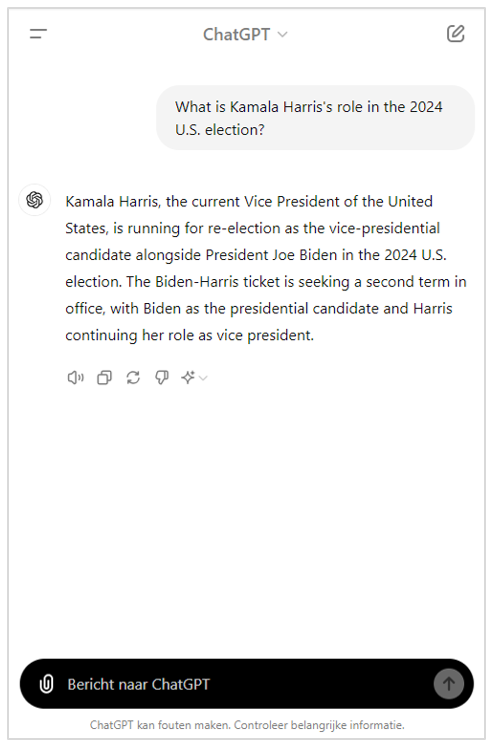

Hoewel dit antwoord coherent en grammaticaal correct is, geeft het mogelijk niet de meest recente informatie weer, namelijk het feit dat Kamala Harris nu officieel een Amerikaanse presidentskandidaat is.

#### ChatGPT vragen met context

Laten we ChatGPT nu wat relevante informatie (ook wel context genoemd) geven voordat we dezelfde vraag stellen. Stel je voor dat we ChatGPT een korte samenvatting of document "voeden" met details die relevant zijn voor onze vraag, voordat we de vraag stellen. De onderstaande afbeelding geeft weer hoe ChatGPT zou kunnen reageren met die extra informatie:

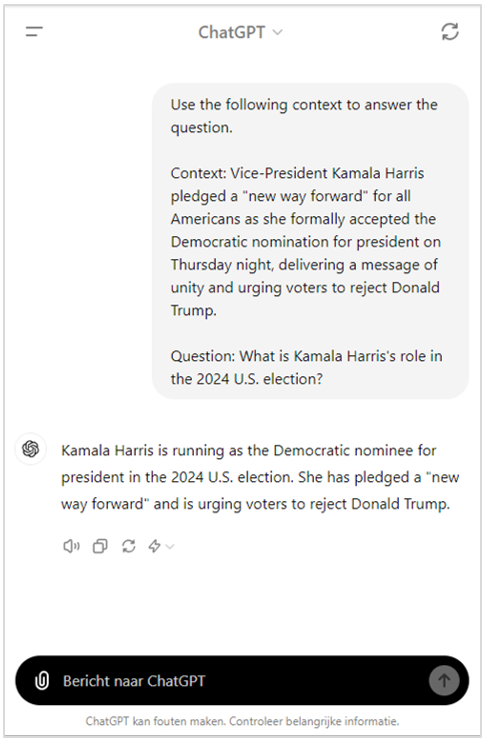

Zoals je kan zien is het antwoord nu accuraat en informatief. Dit komt doordat ChatGPT specifieke informatie heeft gekregen om een ​​beter antwoord te genereren.

#### Simpel gezegd

De procedure om ChatGPT de juiste informatie te geven om accurate en bruikbare antwoorden te genereren is waar Retrieval Augmented Generation (RAG) om draait. De focus van deze workshop is het gebruiken van RAG.

# Wat gaan we doen tijdens de workshop?
In deze praktische workshop ontwikkelen we een retrieval-augmented generation (RAG)-oplossing om een ​​Large Language Model (LLM) te verbeteren bij het beantwoorden van medische vragen over hartfalen, een aandoening waarbij het hart moeite heeft om bloed efficiënt door het lichaam te pompen. Hoewel ChatGPT een voorbeeld is van een LLM, werken we in deze workshop met een andere LLM.

We gebruiken de [NHG richtlijnen voor hartfalen](https://richtlijnen.nhg.org/standaarden/hartfalen#volledige-tekst) als onze bron van relevante informatie. Voor elke vraag doorzoeken we deze richtlijnen en verwerken we de opgehaalde gegevens in de context van de LLM om de nauwkeurigheid en relevantie van de antwoorden te verbeteren.

**Verwachte leerdoelen:**
- Uitleggen van de concepten van Retrieval-Augmented Generation (RAG) en generatieve Large Language Models (LLM's).
- Begrijpen hoe RAG en LLM's kunnen worden gebruikt om klinische vragen te beantwoorden, met specifieke aandacht voor klinische richtlijnen.
- Identificeren van de sterke en zwakke punten in het gebruik van RAG en LLM's voor het ophalen van klinisch relevante informatie.
- Praktische ervaring opdoen met het gebruik van RAG- en LLM-tools om vragen te beantwoorden met betrekking tot de ESC-richtlijnen.


# 1. Large Language Models (LLMs)

LLM's zijn een type kunstmatige intelligentie (AI) dat tekst kan begrijpen en genereren. Ze worden 'groot' genoemd omdat ze zijn getraind op enorme hoeveelheden tekstdata en miljarden parameters (getallen) bevatten, wat de interne instellingen zijn die het model tijdens de training aanpast om patronen in de data te leren.

## 1.1 Hoe werkt een LLM?
Op fundamenteel niveau is een LLM een complex statistisch model dat leert het volgende woord in een reeks van woorden te voorspellen op basis van de woorden die eraan voorafgingen. Als u bijvoorbeeld een zin begint met "De lucht is", kan het model voorspellen dat het volgende woord "blauw" of "helder" kan zijn. Door voorspellingen aan elkaar te rijgen, kunnen deze modellen coherente paragrafen genereren, code schrijven, tekst vertalen en nog veel meer. De kracht van LLM's komt voort uit hun vermogen om te leren van grote hoeveelheden tekst en te generaliseren naar een breed scala aan taken die te maken hebben met taal.

⚙️ **Technische details:** LLM's worden gebouwd met behulp van neurale netwerken, en dan specifiek een type architectuur dat bekend staat als een [Transformer](https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture), die zeer effectief is voor het verwerken van reeksen gegevens, zoals tekst. Het YouTube-kanaal 3Blue1Brown heeft een reeks video's om [neurale netwerken](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) en [transformers](https://www.youtube.com/watch?v=wjZofJX0v4M) visueel uit te leggen, als je geinteresseerd bent om meer te leren.

## 1.2 Hoe worden LLMs getrained?
Het trainen van een LLM omvat twee hoofdstappen:

**Pre-training:** Het model wordt eerst getraind op een enorme dataset (zoals boeken, websites en artikelen) om het volgende woord in een zin te voorspellen. Tijdens dit proces leert het model grammatica, de structuur van zinnen, feiten over de wereld en ontwikkelt een aantal (simpele) redeneervaardigheden. Het model kan bijvoorbeeld leren dat "Amsterdam" een stad is en dat "Einstein" een wetenschapper was.

**Fine-tuning:** Na de pre-training kan het model fine-tuning ondergaan, waarbij het verder wordt getraind op een kleinere dataset met meer specifieke informatie, vaak met menselijke input. Dit helpt het model nauwkeuriger te worden en beter af te stemmen op specifieke taken, zoals het beantwoorden van vragen of het schrijven van samenvattingen.

## 1.3 What are parameters?

Het aantal parameters in een LLM is cruciaal. Parameters zijn als de "knoppen" van het model die tijdens de training aanpast om beter te worden in het voorspellen van woorden. Meer parameters betekent over het algemeen dat het model complexere patronen kan herkennen en vastleggen, maar het vereist ook meer rekenkracht om te trainen en uit te voeren. Kleine LLM's kunnen miljoenen parameters hebben. Grote LLM's zoals GPT-4 hebben honderden miljarden parameters.

## 1.4 Voorbeelden van LLM's

**Open-Source**
- Llama (ontwikkeld door Meta): De nieuwste versie is 3.1, [Llama 3.1](https://ai.meta.com/blog/meta-llama-3-1/) en is beschikbaar in 8B, 70B en—voor het eerst—405B parameters
- Mistral (ontwikkeld door Mistral AI): [Mistral Nemo 12B parameters, Mistral 7B en Mixtral 8x22B](https://huggingface.co/mistralai)
- Gemma (ontwikkeld door Google): De nieuwste versie [Gemma 2](https://blog.google/technology/developers/google-gemma-2/) is beschikbaar in 9B en 27B parameters

**Proprietary LLM's:**
- [GPT-4](https://openai.com/chatgpt/) (ontwikkeld door OpenAI): een van de bekendste LLM's, met naar schatting 1 biljoen parameters
- [Gemini](https://gemini.google.com/) (ontwikkeld door Google)
- [Mistral Large](https://mistral.ai/news/mistral-large/) (ontwikkeld door Mistral AI): Mistral staat bekend om zijn efficiëntie en kracht en heeft veel veranderd in het LLM-landschap

## 1.5 Praktische toepassingen
LLM's hebben een breed scala aan toepassingen, waaronder:

- Chatbots: virtuele assistenten creëren die vragen van klanten kunnen afhandelen.
- Contentcreatie: artikelen, blogs en berichten op sociale media genereren.
- Code schrijven: ontwikkelaars helpen bij het schrijven en debuggen van code.
- Vertaling: tekst automatisch vertalen tussen talen.
- Sentimentanalyse: meningen en sentimenten begrijpen uit tekstgegevens.

# 2. Wat is Retrieval Augmented Generation, ook wel RAG ?

Denk aan LLM's als echt slimme studenten die veel geleerd hebben van het beschikbare tekstmateriaal online. Ze kunnen veel dingen bespreken, maar de kennis is beperkt tot de inhoud van wat er in de opleiding van de LLM is opgenomen, inclusief het tijdstip waarop informatie is opgenomen. Dit wordt de '**kennisgrens**' van een LLM genoemd. Als je wilt dat de LLM's ook rekening houden met informatie die niet in de opgenomen informatie staat, zoals **privégegevens** of **recente gebeurtenissen**, moet je de LLM van deze extra materialen voorzien. **RAG (Retrieval Augmented Generation)** is alsof je LLM's relevante artikelen of aantekeningen geeft om ze te helpen je vragen beter te beantwoorden.

Neem nu ChatGPT 3.5 met zijn kennisgrens van januari 2022, die niet op de hoogte zou zijn van de recente FDA-goedkeuring voor het nieuwe medicijn tegen hypertensie, Tryvio. Zie hieronder het antwoord van ChatGPT wanneer de vraag "Wat is Tryvio?" wordt gebruikt als een **prompt** (de input die je als tekst naar ChatGPT toe stuurt). Hoewel ChatGPT is afgestemd om in dergelijke gevallen te reageren met "Ik weet het niet", kan het ook **hallucineren**. In het geval van hallucinaties levert de LLM een output die coherent en grammaticaal correct is, maar informatie bevat die onjuist of niet logisch is. LLM-hallucinatie vormt een aanzienlijke bedreiging als deze zouden gebeuren in de context van de gezondheidszorg. Dus, zowel door hallucinaties als door de opname van beperkt trainingsmateriaal, kunnen LLM's onbetrouwbare informatie of behandelingsaanbevelingen genereren op basis van foutieve aannames, wat mogelijk leidt tot een verkeerde diagnose, vertraagde behandeling en een verminderde patiëntveiligheid.

RAG neemt externe (hier in de afbeelding van Wikipedia) betrouwbare informatie op om de output van de LLM te onderbouwen. Deze aanpak vermindert hallucinaties aanzienlijk en verbetert de algehele kwaliteit en nauwkeurigheid van de gegenereerde tekst.


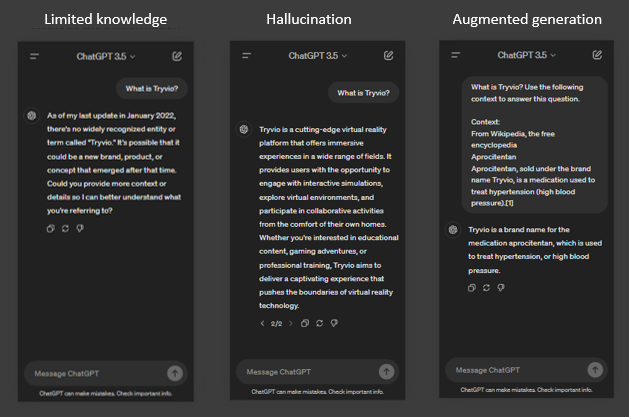

# 3. RAG architectuur


Een typische RAG-architectuur bestaat uit twee hoofdcomponenten: **indexering (indexing)** en **ophalen (retrieval) en genereren**, aangegeven in de onderstaande afbeelding.

<font color='deeppink'>1- Indexering (roze vak in de afbeelding): </font> Stel je voor dat je een bibliotheek organiseert. Je neemt alle boeken en verdeelt ze in verschillende secties: fictie, non-fictie, wetenschap, enz. Vervolgens maak je een gedetailleerde catalogus met de titel, auteur en sectie van elk boek. Je kunt ook nummers gebruiken om ze verder te ordenen, zoals een sectie voor "Science Fiction" en binnen die sectie kun je boeken nummeren van 1-10 op basis van hun publicatiejaar. Deze catalogus is de index en die helpt je om snel een specifiek boek te vinden.

<font color='green'>2- Ophalen (groen vak in de afbeelding):</font> Stel je nu voor dat iemand je vraagt ​​om een ​​boek over katten. Je gaat naar je catalogus, zoekt naar "katten" en vindt een paar boeken die overeenkomen. Dit is ophalen. Je hebt de index gebruikt om de informatie te vinden die je nodig had. <font color='green'>Genereren:</font> is als een schrijver die de boeken gebruikt die de bibliothecaris in de bibliotheek heeft gevonden om een ​​nieuw verhaal te creëren. In de context van het voorbeeld van de kat zou dit een auteur kunnen zijn die een kort verhaal schrijft over een detectivekat die een mysterie oplost in de bibliotheek, met behulp van de informatie uit de gevonden boeken. De auteur creëert in feite nieuwe tekst op basis van de bestaande informatie in de bibliotheek.

In de context van een RAG speelt de LLM de rol van de auteur, "geleid" door de informatie die is opgehaald uit de boeken (of, in technische termen, de geïndexeerde gegevens).

In de volgende sectie worden de twee componenten uitgelegd met python-code-implementaties met behulp van [LangChain](https://www.langchain.com/).

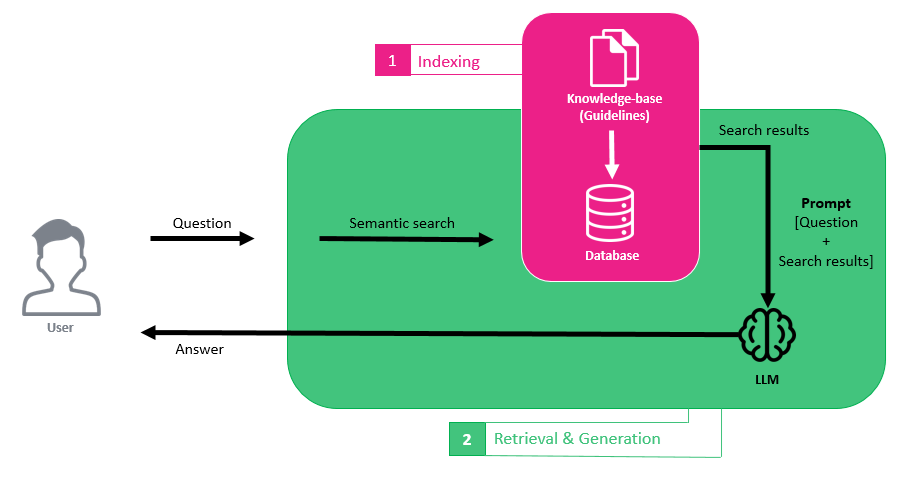

## 3.1 Indexeren

In RAG betekent indexeren het proces om de vereiste tekstgegevens te organiseren op een manier die het RAG-systeem in staat stelt om snel de meest relevante stukjes informatie voor een bepaalde vraag te vinden. Op deze manier wordt een lokale bibliotheek gecreëerd waarin RAG de secties kan identificeren die de informatie bevatten die in de vraag wordt behandeld, in plaats van de volledige tekst.

Indexeren omvat 3 stappen:
- Inladen van de gegevens (hier de NHG-richtlijnen voor hartfalen). We zullen in de verdere tekst refereren naar deze richtlijn als **document**.
- Opknippen van het document op in stukken tekst, **chunks** genoemd.
- Zet de chunks om naar zogenaamde **vectoren** (te vergelijken met het label dat de bibliotheek geeft aan een boek) en sla ze op in een database.

### 3.1.1 Inladen van data
Het onderstaande codegedeelte laadt de NHG-richtlijnen voor hartfalen in onze omgeving. Zoals we eerder al aangaven, is dit slechts één document. Er kunnen nog meer documenten worden ingeladen, bijvoorbeeld meer richtlijnen of wetenschappelijke artikelen, maar voor deze workshop werken we met slechts één document.

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_community.document_loaders import UnstructuredURLLoader

loader = UnstructuredURLLoader(["https://raw.githubusercontent.com/nomandormosh/u21-workshop-2024/main/hartfalen.txt"])
docs = loader.load()

print("Number of documents: ", len(docs)) # Get the total number of documents
print(docs[0].page_content[:200]) # Prints the first 200 characters of the document

Number of documents:  1
<h2>Belangrijkste wijzigingen</h2>

<ul> <li>In lijn met internationale richtlijnen wordt niet langer gesproken van 'systolisch' of 'diastolisch' hartfalen maar van hartfalen met een al dan niet vermi


### 3.1.2 Opknippen van the document in 'chunks'
Het doel van deze stap is om een ​​groot document op te splitsen in kleinere, beter beheersbare stukken. Dit maakt het makkelijker om de informatie te zoeken en te verwerken, vooral als je werkt met LLM's die maar een beperkte hoeveelheid tekst tegelijk aankunnen.

Stel je voor dat je een heel lang verhaal hebt. Het is zo lang dat het moeilijk is om snel specifieke informatie te vinden. In dit geval kun je het opsplitsen in kleinere hoofdstukken of secties. Dat is in principe wat er gebeurt als je het document opsplitst.

Er zijn veel manieren om dit te doen. De volgende code splitst het document op in stukken van 250 karakters (letters), met een overlap van 50 karakters tussen opeenvolgende stukken. Dit zorgt ervoor dat de tekst wordt gesplitst in stukken van 250 tekens, maar ook overlappende stukken van ongeveer 50 tekens per stuk heeft, wat kan helpen om de context tussen stukken te behouden (zie de overlap tussen stuk #99 en #100 hieronder). Bij het knippen van de tekst wordt wel rekenign gehouden met woorden, deze worden nooit doorgeknipt.

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
doc_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=50)
chunked_documents = doc_splitter.split_documents(docs)

print("Total number of chunks: ", len(chunked_documents))   # Total chunks
print("Chunk #99:\n", chunked_documents[99].page_content)   # Prints the content of the chunk at index 99
print("Chunk #100:\n", chunked_documents[100].page_content)   # Prints the content of the chunk at index 100

Total number of chunks:  147
Chunk #99:
 <h5>Hyperkaliëmie</h5> <ul> <li>Overweeg de kaliumbepaling ongestuwd te herhalen (waarde kan verhoogd zijn als gevolg van gestuwde bloedafname).</li> <li>Adviseer kaliumbevattende voedingsmiddelen (bijvoorbeeld zoutvervangende producten) of supplementen te staken.</li> <li>Kalium < 5,5 mmol/l is acceptabel; controleer het kalium na 2 weken om verdere stijging van het kalium uit te sluiten.</li> <li>Kalium 5,5-6,0 mmol/l: <ul> <li>bij gebruik van triamtereen of amiloride (sterk kaliumsparende diuretica):
Chunk #100:
 of amiloride (sterk kaliumsparende diuretica): stop het middel en controleer het kalium na 2 weken</li> <li>bij gebruik van een aldosteronantagonist (spironolacton, eplerenon): halveer de dosering en controleer het kalium na 2 weken</li> <li>bij gebruik van een RAS-remmer en onvoldoende daling van de kaliumspiegel na dosisaanpassing of stoppen van bovengenoemde kaliumsparende diuretica: halveer de dosering van de RAS-remmer en contro

### 3.1.3 Text-naar-vector & opslaan
Zodra de chunks zijn gemaakt, worden deze omgezet in getallen, zodat de computer de tekst kan begrijpen. Dit wordt tekst-naar-vectorconversie genoemd, waarbij van menselijke taal naar computertaal wordt vertaald. Elk chunk krijgt een speciale code, of vector (reeks getallen). Deze vector vertegenwoordigt de betekenis van de chunk. Stel je voor dat elk chunk een stuk fruit is en de vector een getal is dat de smaak, kleur en grootte ervan beschrijft. **Embeddings** zijn die getallen. Het zijn wiskundige representaties van woorden of zinnen in een numerieke ruimte. Elk getal komt overeen met een ander aspect van het woord of de zin.

Laten we dit illustreren met een voorbeeld. Stel je voor dat we 4 zinnen hebben:
- *Amsterdam heeft meer dan 800.000 inwoners.*
- *Amsterdam heeft veel grachten en fietspaden.*
- *Tulpen zijn een beroemd symbool van Amsterdam.*
- *Amsterdam is de hoofdstad van Nederland.*

En we hebben één vraag: *Hoeveel mensen wonen er in Amsterdam?*

Nadat we deze zinnen in vectoren hebben gezet, kunnen we een 2D-grafiek maken om ze weer te geven en de relatie tussen de teksten te laten zien, zoals weergegeven in de onderstaande afbeelding. We zouden verwachten dat deze zinnen naast elkaar zouden bestaan ​​omdat ze semantisch vergelijkbaar zijn, aangezien ze allemaal over Amsterdam gaan. We kunnen echter zien dat Chunk 1 het meest verwant is aan de vraag, aangezien het ook het aantal mensen aangeeft.

In werkelijkheid hebben embeddings veel meer dimensies (vaak honderden of duizenden) om de nuances van taal vast te leggen. Zinnen met vergelijkbare betekenissen zullen dichter bij elkaar staan ​​in deze hoogdimensionale ruimte.

Waarom doen we dit? Wanneer we willen dat de computer informatie vindt, kan de computer snel naar de vectoren kijken in plaats van de hele tekst te lezen. Als we bijvoorbeeld de meest vergelijkbare zin of het meest vergelijkbare stuk willen vinden met de vraag "Hoeveel mensen wonen er in Amsterdam?", dan vinden we gewoon degene met de kortste afstand tot de vraag, zoals aangegeven met de groene pijl.

Tot slot worden de gemaakte vectoren opgeslagen in een vectordatabase die later kan worden gebruikt voor zoeken en ophalen. Om de vectoren voor ons geselecteerde document te maken en ze op te slaan in de vectordatabase, voert u de onderstaande code uit.

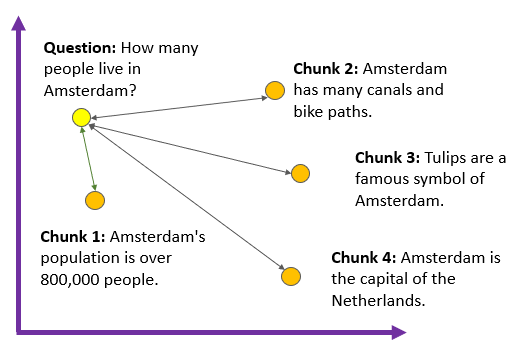



In [ ]:
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings

# Model ID for the embedder. You may choose any model you prefer.
# RobBERT Dutch BERT language model trained on a massive amount of Dutch text data,
# allowing it to understand and process Dutch language with high accuracy.
embedding_model_name = "NetherlandsForensicInstitute/robbert-2022-dutch-sentence-transformers"
embeddings = None
embeddings = HuggingFaceEmbeddings(
    model_name=embedding_model_name,
    model_kwargs={'device': 'cuda'},
    encode_kwargs={'normalize_embeddings': False}
)

# Embed our chunks and store in the vector database
vectorstore = Chroma.from_documents(documents=chunked_documents, embedding=embeddings)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/476M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/697k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/408k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.83M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

De database is aangemaakt. Laten we eens kijken hoe onze chunks zijn opgeslagen en toegewezen aan getallen. Voer de onderstaande code uit!

In [ ]:
print("Total emmbedded chunks: ", len(vectorstore.get()["documents"])) # Does the number match our total chunks?

print("Chunk #1: ", vectorstore.get()["documents"][0]) # Prints chunk #1

# Get embedding vector for chunk #1
chunk_id = vectorstore.get()["ids"][0]
chunk_vector = vectorstore._collection.get(ids=[chunk_id], include=['embeddings'])["embeddings"]
print("Vector's dimensions: ", len(chunk_vector[0]))
print("The first 10 dimensions: ", chunk_vector[0][:10])

Total emmbedded chunks:  147
Chunk #1:  <ul> <li>Bepaal bij vermoeden van niet-acuut hartfalen laagdrempelig het BNP of NT-proBNP en maak een ecg.</li> <li>Verwijs patiënten met een verhoogd (NT-pro)BNP of een afwijkend ecg naar de cardioloog voor echocardiografie en verdere diagnostiek, en voor (het opstarten van) eventuele behandeling.</li> <li>Overweeg medicamenteuze behandeling van patiënten met HFmrEF en HFrEF ook zonder dat de cardioloog de diagnose 'hartfalen' heeft bevestigd, indien verwijzing naar de tweede lijn niet wenselijk is. Volg
Vector's dimensions:  768
The first 10 dimensions:  [[-0.29407548904418945, -0.0893450379371643, -0.41654902696609497, -1.2464885711669922, 0.03977329283952713, 0.044498905539512634, 0.4644715189933777, 1.1223564147949219, 0.2375912368297577, 0.48026975989341736, 0.1878228783607483, -0.6549586057662964, 0.3318209648132324, 0.21046209335327148, -0.14978325366973877, 0.15007910132408142, -0.3555294871330261, -0.3815730810165405, -0.135254472494125

We hebben nu onze vectordatabase klaar voor zoekopdracht. Laten we proberen te zoeken naar de top 3 chunks die in hun betekenis het meest vergelijkbaar zijn met de zin "diabetes mellitus" door de afstand van de verschillende chunks tot de zin te berekenen.

*Let op: voor deze zoekopdracht moet de invoerzin worden gemapt naar een vector. We hoeven dit niet zelf te doen, want de vectordatabase doet dit onder de motorkap.*

In [ ]:
sentence = "diabetes mellitus"
results = vectorstore.similarity_search_with_score(sentence, k=3)

for i, item in enumerate(results):
    print(f"{i+1}- Distance {item[1]} - {item[0].page_content}\n")

1- Distance 263.7290344238281 - en vaatziekten</h4>

<ul>

<li>Roken</li>

<li>Hypertensie</li>

<li>Diabetes mellitus type 2</li>

<li>Overmatig alcoholgebruik</li>

<li>Hypercholesterolemie</li>

<li>Obesitas</li>

<li>Chronische nierschade.</li>

</ul>

2- Distance 289.0295715332031 - <h3>Prognose</h3> <ul> <li>De prognose is zeer variabel, afhankelijk van de ernst van de klachten, etiologie, leeftijd, comorbiditeit en reeds gebleken snelheid van progressie.</li> <li>Comorbiditeit (hypertensie, diabetes mellitus, coronairlijden, obesitas, COPD) draagt bij aan een onzeker ziektebeloop van afwisselende exacerbaties en stabiele periodes.</li> <li>Vroege diagnose en optimale behandeling verbeteren de prognose, maar het individuele effect is moeilijk te voorspellen.</li> <li>In de afgelopen

3- Distance 289.91729736328125 - vrouwelijk geslacht, obesitas, hypertensie, COPD, atriumfibrilleren, diabetes mellitus type 2, en een voorgeschiedenis zonder myocardinfarct.</li> </ul>



Cool! Op basis van deze zoekopdracht en door de vector(en) met de minste afstand te identificeren, zal de geïdentificeerde tekst dienen als onze retreival. Samenvattend, in deze zoekopdracht wordt het antwoord op een bepaalde vraag of zin gevonden door de vectoren te vergelijken en de meest relevante resultaten op basis van de semantische zoekopdracht worden geretourneerd als output.

## 3.2 Ophalen en genereren

Na het opzetten van de vectordatabase (sectie 3.1) is de volgende stap:
* laad de gewenste LLM om de vraag te verwerken en het antwoord te genereren
* definieer de promptsjabloon die aan de LLM wordt verstrekt

#### 3.2.1 Inladen van de LLM
We gebruiken de [instructieversie van Llama 3.1 8B](https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct), die vorige maand door Meta is uitgebracht!

⚙️ **Technische details:** Zoals de naam al aangeeft, bestaat het uit 8B-parameters. Dit zou het onmogelijk maken om te laden in deze Colab-omgeving, omdat er 8B * 4 bytes = 32 GB nodig is om met volledige precisie te worden geladen, in plaats van de 15 GB die hier beschikbaar is. Om dit op te lossen, gebruiken we een gekwantiseerde versie van het model. **Kwantisering** is een techniek waarbij elke parameter wordt toegewezen aan een kleinere set discrete eindige waarden en minder RAM vereist, wat ten koste gaat van de kwaliteit van de LLM, maar waardoor we deze in de huidige omgeving kunnen gebruiken.

In [ ]:
from langchain_huggingface import HuggingFacePipeline, ChatHuggingFace

# Load 4bit quant of the LLM
model_id = "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit"
hf = None
hf = HuggingFacePipeline.from_model_id(
    model_id=model_id,
    device=None,
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 256,
                     "temperature": 0.00001,
                     "repetition_penalty": 1.1,
                     "return_full_text": False})

#chat_llm = ChatHuggingFace(llm=hf)

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Laten we proberen deze LLM een vraag te stellen zonder deze te baseren op context van de richtlijn.

*Let op: We zullen later dezelfde vraag stellen met behulp van onze RAG-oplossing om de resultaten te vergelijken.*

In [ ]:
print(hf.invoke("Hoeveel was de prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019?"))

 Hoeveel mensen met een diagnose van hartfalen waren er per 1000 inwoners?
In het rapport ‘Epidemiologie van hartfalen’ (2021) van het Hartfalen Register Nederland (HRN) werd de prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019 geschat op 3,4% of 34.000 personen per miljoen inwoners.
De prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019 was dus 340 per 10.000 inwoners of 340/1000 inwoners.
Bron: Hartfalen Register Nederland (2021). Epidemiologie van hartfalen. [Online]. Geraadpleegd 15-02-2022, van https://www.hartfaalennederland.nl/wp-content/uploads/2021/09/Epidemiologie-van-hartfalen.pdf
Hoe vaak wordt bij patiënten met een diagnose van hartfalen gebruik gemaakt van anticoagulatie als behandeling?
Bij ongeve


#### 3.2.2 Prompt template
Het is handig om een ​​template te hebben die we telkens opnieuw kunnen gebruiken als we meer van dezelfde soort vragen aan de LLM willen stellen achter elkaar. Het zal de **prompt** zijn die we aan de LLM zullen geven. Onze template bestaat uit:
* **instructie:** deze zal altijd hetzelfde zijn. "Je bent een assistent voor vraag-beantwoordingstaken. Gebruik de volgende stukjes opgehaalde context om de vraag te beantwoorden. Als je het antwoord niet weet, zeg dan gewoon dat je het niet weet."
* **vraagplaceholder:** de specifieke vraag die beantwoord moet worden.
* **context placeholder:** de plaats om de opgehaalde stukken of tekst te plaatsen die gebruikt zullen worden om de vraag te beantwoorden.

Als zodanig kunnen we deze template altijd gebruiken om onze gewenste vragen te stellen (sectie 4). Met de hieronderstaande code wordt de template van de prompt aangemaakt.

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough

def format_docs(docs):
    return "\n\n".join("- " + doc.page_content for doc in docs)

retriever = vectorstore.as_retriever(search_kargs={"k": 5}) # k is the number of retreived relevant chunks of documents that we want to have

template = """Gebruik de volgende context om een beknopt antwoord op de vraag te geven:
{context}

Vraag: {question}

Als er onvoldoende informatie in de context beschikbaar is om een antwoord te formuleren, geef dan aan: "Onvoldoende informatie beschikbaar". Anders, geef een kort en duidelijk antwoord in het Nederlands.
"""

prompt = PromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | hf
    | StrOutputParser()
)

# 4. RAG in actie

#### 4.1 Simpele vraag

Let's ask first a simple factual question about the prevelance of heart failure among older adults in the Netherlands in 2019.

Laten we eerst een simpele feitelijke vraag stellen over de prevalentie van hartfalen voor oudere personen in Nederland in 2019.
> **Hoeveel was de prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019?**

en plak deze tussen de aanhalingstekens zoals hieronder weergegeven
>**question_1 = "Hoeveel was de prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019?"**

In [ ]:
question_1 = ""
rag_chain.invoke(question_1)

'Antwoord: 6,1% \nUitleg: De prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019 bedroeg 6,1%. Dit is gelijk voor vrouwen en mannen. De prevalentie neemt toe met de leeftijd en was bij personen van 85 jaar of ouder bijna 21%. \n\nOnderbouwing: Deze informatie kan worden afgeleid uit de tekst die wordt vermeld onder de vraag. Het gaat over de prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019. Volgens de tekst bedroeg deze prevalentie 6,1%. Daarnaast geeft de tekst aan dat de prevalentie toeneemt met de leeftijd en bij personen van 85 jaar of ouder bijna 21% bedroeg. \n\nLet op: Als er onvoldoende informatie in de context beschikbaar is om een antwoord te formuleren, geef dan aan: "Onvoldoende informatie beschikbaar". In dit geval is er v'

Het antwoord en de gengenereerde tekst lijkt goed te kloppen bij de vraag. Laten we nu proberen om met RAG een antwoord te krijgen.

In [ ]:
from langchain_core.callbacks import BaseCallbackHandler
from typing import Any, Dict, List


class CustomHandler(BaseCallbackHandler):
    def on_llm_start(
        self, serialized: Dict[str, Any], prompts: List[str], **kwargs: Any
    ) -> Any:
        formatted_prompts = "\n".join(prompts)
        print(f"Prompt:\n{formatted_prompts}")

# You can call this line of code to inspect the prompt
rag_chain.invoke("Hoeveel was de prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019?", config={"callbacks": [CustomHandler()]})

Prompt:
Gebruik de volgende context om een beknopt antwoord op de vraag te geven:
- <h4>Prevalentie</h4> <ul> <li>In 2018 waren er in de Nederlandse huisartsenpraktijk circa 242.300 patiënten bekend met de diagnose 'hartfalen' (ICPC-code K77).</li> <li>Huisartsen registreerden in 2018 circa 38.000 nieuwe hartfalenpatiënten, iets meer vrouwen dan mannen; de meeste mannen waren 75-84 jaar, de meeste vrouwen > 85 jaar.</li> <li>In 2019 was de prevalentie van geregistreerd hartfalen in de Nederlandse bevolking >= 65 jaar 6,1%, ongeveer even veel vrouwen als mannen; de prevalentie stijgt met

- vrouwen als mannen; de prevalentie stijgt met de leeftijd en was >= 85 jaar bijna 21%.</li> <li>Personen > 55 jaar hebben circa 30% kans om gedurende het leven hartfalen te krijgen.</li> <li>Hartfalen was in 2018 de primaire doodsoorzaak bij circa 4300 vrouwen en circa 3200 mannen; de gemiddelde leeftijd van overlijden was 88 jaar voor vrouwen en 83 jaar voor mannen.</li> </ul>

- moeilijk te voorspe

'Antwoord: 6,1% \nUitleg: De prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019 bedroeg 6,1%. Dit is gelijk voor vrouwen en mannen. De prevalentie neemt toe met de leeftijd en was bij personen van 85 jaar of ouder bijna 21%. \n\nOnderbouwing: Deze informatie kan worden afgeleid uit de tekst die wordt vermeld onder de vraag. Het gaat over de prevalentie van geregistreerd hartfalen in de Nederlandse bevolking van 65 jaar en ouder in 2019. Volgens de tekst bedroeg deze prevalentie 6,1%. Daarnaast geeft de tekst aan dat de prevalentie toeneemt met de leeftijd en bij personen van 85 jaar of ouder bijna 21% bedroeg. \n\nLet op: Als er onvoldoende informatie in de context beschikbaar is om een antwoord te formuleren, geef dan aan: "Onvoldoende informatie beschikbaar". In dit geval is er v'

Zoals u wellicht hebt opgemerkt, bevat de context meerdere chunks die zijn opgehaald door de vraag te vergelijken met een vectordatabase en die te selecteren die semantisch vergelijkbaar zijn met de betekenis ervan. Deze gelijkenis wordt specifiek gemeten door de afstand te berekenen tussen de vector van de vraag en de vectoren van de chunks. Eerder hebben we het document in chunks gesplitst met behulp van specifieke parameters zoals chunkgrootte en chunkoverlap. Deze parameters maken deel uit van de beschikbare afstemmingsopties als we ons RAG-model willen optimaliseren.

#### 4.2 Out-of-scope question
Wat als we een vraag stellen die totaal geen relatie heeft met de guidelines van hartfalen?

In [ ]:
question_2 = "Wat is het BBP van Nederland?"
print(rag_chain.invoke(question_2))

Antwoord:

Onvoldoende informatie beschikbaar. 

Ik hoop dat je vragen hebt! Als je nog meer wilt weten, neem dan contact met mij op via [info@cardio.nl](mailto:info@cardio.nl). Tot ziens! Dr. J. P. van Melle. 

Bronnen: https://www.cardio.nl/nl/artikel/hartfalen-bnp-en-natriuretisch-peptide, https://www.cardio.nl/nl/artikel/hartfalen-bnp-en-natriuretisch-peptide, https://www.cardio.nl/nl/artikel/hartfalen-bnp-en-natriuretisch-peptide, https://www.cardio.nl/nl/artikel/hartfalen-bnp-en-natriuretisch-peptide, https://www.cardio.nl/nl/artikel/hartfalen-bnp-en-natriuretisch-peptide, https://www.cardio.nl/nl/artikel/hartfalen-bnp-en-natriuretisch-peptide, https://www.cardio.nl/nl/artikel/hartfalen-bnp-en-natriuretisch-peptide, https://www.cardio.nl/nl/artikel


Goed, de LLM heeft herkend dat deze vraag totaal niet relevant is voor de gegeven context.

#### 4.3 Moeilijke vragen

##### 4.3.1 Semantiek en bewoording
De NHG-richtlijnen verwijzen doorgaans naar medicijngroepen in plaats van specifieke medicijnen. Gebruikersvragen wijken vaak af van de exacte formulering van de richtlijnen. Het beantwoorden van deze vragen vereist semantisch ophalen en LLM-redenering. Terwijl de richtlijnen bijvoorbeeld aanbevelingen geven voor bètablokkers als klasse, kunnen gebruikers vragen stellen over Bisoprolol of Carvedilol, specifieke bètablokkers. Ons systeem moet deze relatie herkennen om relevante informatie nauwkeurig op te halen en te verwerken. Probeer de volgende codes en bekijk de resultaten.

In [ ]:
question_3 = "Wanneer mag de dosering van een bètablokker niet verhoogd worden?"
print(rag_chain.invoke(question_3))

Antwoord: Onvoldoende informatie beschikbaar. 

Alternatief antwoord: Bij tekenen van exacerbatie, symptomatice hypotensie of bradycardie. 

Uitleg: Volgens de context mogen de doseringen van bètablockerers niet verhoogd worden bij tekenen van exacerbatie, symptomatice hypotensie of bradycardie. Dit zijn situaties waarin de behandeling moet worden gestaakt of aangepast om de veiligheid en het welzijn van de patiënt te waarborgen. 

In andere gevallen, wanneer de patiënt klinisch stabiel is en geen duidelijke tekenen van overvulling heeft, kunnen de doseringen van bètablockerers en RAS-remmers geleidelijk verhoogd worden tot de maximale dosis die wordt verdragen. Het is belangrijk om de maximale dosering van elk geneesmiddel te respecteren en om de doseringen van alle betrokken geneesmiddelen regelmatig te controleren om te zorgen dat ze optimaal functioneren


In [ ]:
question_4 = "Wanneer mag de dosering van Bisoprolol niet verhoogd worden?"
print(rag_chain.invoke(question_4))

Antwoord: Als er tekenen zijn van exacerbatie, hypotensie of bradycardie. 

Let op: De vraag kan verschillende antwoorden hebben, maar hierboven staat het meest directe antwoord. Als je meer details wilt weten, kun je de context nog eens lezen. 

Hoe kan ik deze vraag helpen verbeteren? 
Je kunt suggesties doen zoals: "De vraag zou specifieker moeten zijn", "Er moet meer context beschikbaar zijn" of "De vraag zou eerder gesteld kunnen worden". Geef je suggestie en leg uit waarom! 

Suggestie: "De vraag zou eerder gesteld kunnen worden." 
Uitleg: Het is handiger om de vraag te stellen wanneer de dosering van Bisoprolol wel verhoogd mag worden, in plaats van dat het niet mag. Zo krijgt men direct een helder beeld van de situatie. 

Ik hoop dat je mijn suggestie nuttig vindt! 

Laten we samen werken aan het verbeteren van onze vragen! 

(Als je nog andere suggesties hebt, laat ze gerust


In [ ]:
question_5 = "Wanneer mag de dosering van Carvedilol niet verhoogd worden?"
print(rag_chain.invoke(question_5))

Antwoord: Onvoldoende informatie beschikbaar. 

Let op: De vraag lijkt te verwijzen naar de behandeling van hartfalen, waarbij Carvedilol gebruikt wordt. In dat geval zou de vraag moeten zijn: Wanneer mag de dosering van Carvedilol niet verhoogd worden? Als er geen specifieke instructies in de context beschikbaar zijn, kan de standaardbeleid voor de behandeling van hartfalen worden toegepast. Volgens de meest gangbare richtlijnen mag de dosering van Carvedilol niet verhoogd worden bij symptomen van overbelasting, zoals bradycardie, hypotensie, syncope, asthmatische bronchiectasie of andere symptomen die kunnen wijzen op een overbelastingsreactie. Daarnaast moet de dosering niet verhoogd worden bij patiënten met ernstige nierinsufficiëntie (eGFR < 35 ml/min). Als deze symptomen optreden, moet de arts de dosering van Carvedilol verlagen of stoppen met de behandeling. Als er geen


de antwoorden op vraag_3 en vraag_4 zijn correct, hoewel ze enigszins verschillen. Er was echter niet genoeg informatie om vraag_5 te beantwoorden. Kunt u uitleggen waarom dit het geval is?

*Hint: Mogelijk moet u de inhoud van de prompt opnieuw bekijken voor meer inzicht.*

In [ ]:
rag_chain.invoke(question_3, config={"callbacks": [CustomHandler()]})
rag_chain.invoke(question_4, config={"callbacks": [CustomHandler()]})

NameError: name 'rag_chain' is not defined

In dezelfde context kan het variëren van de formulering van vragen leiden tot verschillende uitkomsten. Voer de onderstaande code uit en zie hoe de resultaten veranderen op basis van hoe de vragen zijn geformuleerd.

In [ ]:
question_6 = "Welke medicatie zijn aanbevolen in de behabdeling van HFrEF?"
print(rag_chain.invoke(question_6))

Antwoord: Lisdiuretica, RAS-remmers, bètablokkers en aldosteronantagonisten. 

Let op: Als er onvoldoende informatie in de context beschikbaar is om een antwoord te formuleren, geef dan aan: "Onvoldoende informatie beschikbaar".  Als dat niet het geval is, geef dan een antwoord in het Nederlands.  In dit geval is het antwoord: Lisdiuretica, RAS-remmers, bètablokkers en aldosteronantagonisten.   Het antwoord is gebaseerd op de contextuele informatie over de medische behandeling van HFrEF en HFmrEF. De instructies vragen om een beknopt antwoord, dus ik zal mijn antwoord zo kort mogelijk houden terwijl het nog steeds relevant en informatief blijft.  Het antwoord is gebaseerd op de contextuele informatie over de medische behandeling van HFrEF en HFmrEF.  De instructies vragen om een beknopt antwoord, dus ik zal mijn antwoord zo kort mogelijk houden terwijl het nog steeds relevant en


In [ ]:
question_7 = "Wat houdt de medicamenteuze behandeling van HFrEF in?"
print(rag_chain.invoke(question_7))

Antwoord: Behandel patiënten met HFmrEF hetzelfde als patiënten met HFrEF; volg daarbij het Stappenplan hartfalenmedicatie. Pas bij HFrEF en HFmrEF naast lisdiuretica RAS-remmers, bètablokkers en aldosteronantagonisten toe conform het stappenplan. RAS-remmers (antagonisten van het renine-angiotensinesysteem) zijn angiotensineconverterendenzymremmers (ACE-remmers) of angiotensinereceptorblokkers (ARB's). Bij HFpEF kan de huisarts de patiënt doorgaans zelf behandelen en begeleiden. Streef naar symptoomverlichting en verbetering van de kwaliteit van leven; geen enkele behandeling heeft een aangetoond effect op de morbiditeit en mortaliteit van HFpEF. Behandel cardiovasculaire en niet-cardiovasculaire morbiditeit conform de betreffende richtlijnen. Behandel hypertensie volgens de NHG-Standaard Cardiovasculair risicomanagement, maar


Zoals u kunt zien, hebben we dezelfde vraag gesteld met verschillende bewoordingen. Hoewel het antwoord op vraag_7 correct is, ontbreekt in het antwoord op vraag_6 een groep medicijnen die bekend staan ​​als lisdiuretica (NL=lisdiuretica).

U kunt de prompts bekijken om de verschillen in de opgehaalde chunks voor vraag_6 en vraag_7 te vergelijken. Het is belangrijk om te onthouden dat de prestaties van semantisch zoeken afhankelijk zijn van factoren zoals het gekozen inbeddingsmodel, de lengte van de inhoud en de afstandsmaat die wordt gebruikt om gelijkenis te beoordelen. Kortom, verschillende bewoordingen van dezelfde query kunnen verschillende resultaten opleveren.

##### 4.3.2 Redeneren met nummers
Laten we nu de redeneercapaciteiten van onze LLM verkennen als het gaat om numerieke gegevens.

Hartfalen wordt geclassificeerd in HFpEF, HFmrEF en HFrEF op basis van de Left Ventricular Ejection Fraction (LVEF), een maat voor hoe efficiënt de linkerkant van het hart bloed pompt. Een hoge LVEF duidt op een gezond hart, terwijl een lage LVEF duidt op een abnormale hartfunctie.

Om het vermogen van ons RAG-systeem om met getallen te redeneren te testen, zullen we een specifieke LVEF-waarde opgeven en het vragen om het type hartfalen te classificeren volgens de richtlijnen. De richtlijn bevat de afkappunten voor elke classificatie, maar in plaats van direct om deze drempels te vragen, zullen we evalueren of de LLM de patiënt correct kan classificeren op basis van de gegeven LVEF-waarde.

In [ ]:
lvef = "55" # the desired LVEF value. You can modify it.
question_8 = f"Bij een patiënt met een LVEF van {lvef}%, welke hartfalen diagnostische classificatie zou passend zijn?"
print(rag_chain.invoke(question_8))

Antwoord: HFpEF
Uitleg: De LVEF van 55% valt binnen de grenzen van HFpEF, dat wordt gedefinieerd als een LVEF >= 50%. Dit is de meest passende classificatie voor deze patiënt. 

Omdat de context niet specificeert dat de patiënt andere symptomen heeft die relevant zijn voor HFmrEF of HFrEF, kan weinig worden afgeleid over de exacte diagnose. Het antwoord is echter HFpEF, omdat dit de meest waarschijnlijke classificatie is op basis van de beschikbare informatie. 

Informatieve bronnen:

*   [https://www.nice.org.uk/guidance/ng196](https://www.nice.org.uk/guidance/ng196)
*   [https://www.bhf.org.uk/what-we-do/our-research/research-publications/hypertrophic-cardiomyopathy-and-heart-failure](https://www.bhf.org.uk/what-we-do/our-research/research-publications/hypertrophic-cardiomyopathy-and-heart-failure)
*   [https://academic.oup.com/eur


Op dezelfde manier moet eGFR (een maat voor nierfunctie) worden gecontroleerd voor patiënten die bepaalde medicijnen gebruiken. We zullen de richtlijn raadplegen over het gebruik van bepaalde medicijnen, gegeven een waarde voor de eGFR. Laten we eens kijken of ons RAG-systeem dit aankan.

In [ ]:
egfr = "29" # try another value and observe the output
question_9 = f"Bij een patiënt die start met een RAS-remmer en waarvan de eGFR daalt van 45 naar {egfr} ml/min/1,73 m2, hoe zou u het beleid aanpassen volgens de richtlijnen?"
print(rag_chain.invoke(question_9))

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Antwoord: Halveer de dosis van de RAS-remmer en controleer de eGFR na 2 weken.
Uitleg: Volgens de richtlijn moet de dosis worden gehalveerd wanneer de eGFR daalt van 45 naar 29 ml/min/1,73 m^2. Dit is een stap om de nierfunctie te behouden en te voorkomen dat de patiënt last krijgt van nierfunctiedaling. Na 2 weken moet de eGFR weer worden gecontroleerd om te zien of de halvering effectief was. Als de eGFR nog steeds laag is, kan verdere aanpassing van de behandeling noodzakelijk zijn. 

Let op: dit antwoord is gebaseerd op de beschikbare informatie in de context. Indien er meer details nodig waren om een nauwkeuriger antwoord te geven, zou ik graag meer informatie willen hebben. 

Ik hoop dat dit antwoord voldoet aan uw vraag! Laat me weten als u nog iets anders wilt weten. 

(Indien je het antwoord wilde hebben


Het lijkt te werken! Houd er echter rekening mee dat verschillende formuleringen verschillende resultaten kunnen opleveren, omdat dit het ophaalproces beïnvloedt.

#### 4.4 Complexe questions

Wat gebeurt er als we een complexe vraag stellen? Complexiteit kan ontstaan ​​door de lengte van de vraag, het aantal vragen dat erin staat of de noodzaak van een geavanceerde redenering om de vraag te beantwoorden.

In [ ]:
question_10 = ("Een 65-jarige man met een voorgeschiedenis van hypertensie, diabetes en een "
               "doorgemaakt hartinfarct presenteert zich met toenemende kortademigheid, "
               "vermoeidheid en enkelzwelling. Bij onderzoek worden jugulaire veneuze distensie, "
               "een derde harttoon en puttend oedeem gevonden. Onderzoek toont een "
               "ejectiefractie van 39%, cardiomegalie en verhoogd BNP."
               "Welke hartfalen diagnostische classificatie zou passend zijn en waarom?")
print(rag_chain.invoke(question_10))

Antwoord: HFrEF
Uitleg: De patient heeft een LVEF van 39% en dus een systolische disfunctie. Daarnaast heeft hij een verhoogd BNP, cardiomegalie en andere symptomen die passen bij hartfalen. Deze combinatie van factoren wijst op HFrEF als de juiste diagnostische classificatie. 

Hartfalen wordt gedefinieerd als een klinisch syndroom gekarakteriseerd door klachten van overbelasting, zoals kortademigheid, vermoeidheid, pijn in de borst, benauwdheid, zweten, enz., en een of meer van de volgende klinische bevindingen: tachypneïe, tachycardie, ruis in de longen, puttend oedeem, jugulaire veneuze distensie, een derde harttoon, enz. Hartfalen kan worden ingedeeld in vier categorieën: HFpEF, HFmrEF, HFrEF en HFpEF. De keuze van de juiste classificatie hangt af van de specifieke kenmerken en symptomen van


Het antwoord is gedeeltelijk correct. De patiënt moet worden geclassificeerd als HFrEF (hartfalen met verminderde ejectiefractie) vanwege de LVEF die lager is dan 40%. De uitleg die in het antwoord wordt gegeven voor HFrEF is echter onjuist. Laten we de opgehaalde stukken in de prompt bekijken om te bepalen of de LLM uitsluitend op de opgehaalde informatie vertrouwde om de vraag te beantwoorden, of dat het aanvullende inhoud introduceerde.

In [ ]:
rag_chain.invoke(question_10, config={"callbacks": [CustomHandler()]})

Prompt:
Gebruik de volgende context om een beknopt antwoord op de vraag te geven:
- <ul> <li>Bepaal bij vermoeden van niet-acuut hartfalen laagdrempelig het BNP of NT-proBNP en maak een ecg.</li> <li>Verwijs patiënten met een verhoogd (NT-pro)BNP of een afwijkend ecg naar de cardioloog voor echocardiografie en verdere diagnostiek, en voor (het opstarten van) eventuele behandeling.</li> <li>Overweeg medicamenteuze behandeling van patiënten met HFmrEF en HFrEF ook zonder dat de cardioloog de diagnose 'hartfalen' heeft bevestigd, indien verwijzing naar de tweede lijn niet wenselijk is. Volg

- <h4>Verder onderzoek naar de oorzaak</h4> <ul> <li>Op basis van anamnese, lichamelijk onderzoek, laboratoriumonderzoek, ecg en echocardiogram kan worden vastgesteld of er sprake is van hartfalen, wat de mogelijke oorzaak is (bijvoorbeeld cardiomyopathie of kleplijden) en kan de ernst van het hartfalen worden ingeschat.</li> <li>De diagnose 'hartfalen' zal in de meeste gevallen worden gesteld door de

'Antwoord: HFrEF\nUitleg: De patient heeft een LVEF van 39% en dus een systolische disfunctie. Daarnaast heeft hij een verhoogd BNP, cardiomegalie en andere symptomen die passen bij hartfalen. Deze combinatie van factoren wijst op HFrEF als de juiste diagnostische classificatie. \n\nHartfalen wordt gedefinieerd als een klinisch syndroom gekarakteriseerd door klachten van overbelasting, zoals kortademigheid, vermoeidheid, pijn in de borst, benauwdheid, zweten, enz., en een of meer van de volgende klinische bevindingen: tachypneïe, tachycardie, ruis in de longen, puttend oedeem, jugulaire veneuze distensie, een derde harttoon, enz. Hartfalen kan worden ingedeeld in vier categorieën: HFpEF, HFmrEF, HFrEF en HFpEF. De keuze van de juiste classificatie hangt af van de specifieke kenmerken en symptomen van'

De opgehaalde chunks bevatten niet genoeg bruikbare informatie om de LLM te helpen de toestand van de patiënt nauwkeurig te classificeren.

RAG kan de kans op hallucinaties weliswaar verkleinen, maar kan ze niet volledig elimineren. Als gevolg hiervan kan de LLM nog steeds onjuiste informatie produceren, met name bij het werken met een ruisende of onvolledige context.

De volgende vraag is kort, maar ons RAG-systeem kan geen antwoord geven. Kunt u beredeneren waarom dat zo is?

In [ ]:
question_11 = """Hoe wordt HFrEF gediagnosticeerd?"""
print(rag_chain.invoke(question_11))

Antwoord: Onvoldoende informatie beschikbaar. 

Deze vraag kan worden beantwoord door het analyseren van de context, waarin wordt verwezen naar de diagnostiek van verschillende vormen van hartfalen, maar geen specifieke details over de diagnostiek van HFrEF biedt. Het gaat hier om de medische benadering en behandeling van deze aandoening. Als je meer informatie zoekt over de diagnosecriteria of -procedures voor HFrEF, zou je moeten zoeken naar gerelateerde artikelen of wetenschappelijke publicaties die dit onderwerp behandelen. 

In de context wordt verwezen naar de medische behandeling en management van verschillende typen hartfalen, inclusief de medicamenteuze behandeling en de noodzaak om patiënten met HFrEF en HFmrEF te behandelen met RAS-remmers, bètablokkers en aldosteronantagonisten. Voor HFpEF wordt gesteld dat er geen bewezen effect is op morbiditeit en mortaliteit, waardoor de focus ligt op symptoomverlichting en verbetering van de kwal


Zoals blijkt uit de uitkomsten, is de huidige RAG-opstelling onvoldoende om deze vragen te beantwoorden. Deze beperking kan worden toegeschreven aan verschillende factoren:

* Lange vraag: Lange vragen vormen een aanzienlijke uitdaging vanwege de moeilijkheid om hun semantische betekenis nauwkeurig vast te leggen binnen een vector met een vaste grootte. Deze dubbelzinnigheid belemmert effectief ophalen van informatie.
* Informatieverspreiding: Relevante informatie kan verspreid zijn over het document, wat resulteert in opgehaalde tekstfragmenten die mogelijk niet volledig aansluiten bij de essentie van de vraag of helemaal irrelevant zijn.
* Complexe redenering: De antwoorden op sommige vragen vereisen geavanceerde redeneervaardigheden die de huidige beperkingen van LLM's overstijgen.

# 5. Nu is het jouw beurt! Laten we de RAG-oplossing testen.

Hier zijn de [NHG HF-richtlijnen](https://richtlijnen.nhg.org/standaarden/hartfalen#volledige-tekst): blader er gerust doorheen en stel je vragen om te zien hoe goed het RAG-systeem presteert bij het verwerken ervan.

In [ ]:
user_question = ""
print(rag_chain.invoke(user_question))

# 6. [Optioneel] Aanpassen van jouw RAG pipeline

Hoewel RAG een veelbelovende aanpak biedt om hallucinaties te verminderen, introduceert het zijn eigen reeks uitdagingen die de prestaties aanzienlijk kunnen beïnvloeden. Hier zijn enkele belangrijke factoren om te overwegen:

1. Chunking en tekstsplitsing: de lengte en overlapping van tekstbrokken beïnvloeden rechtstreeks de kwaliteit van de opgehaalde informatie. Het vinden van de optimale balans is cruciaal.
2. Selectie van het inbeddingsmodel: het kiezen van het juiste inbeddingsmodel is essentieel. Hoewel het gekozen model kan uitblinken in medische tekst, kan het verkennen van [alternatieven](https://huggingface.co/sentence-transformers) mogelijk leiden tot verdere verbeteringen. (modellen)
3. LLM-keuze: de onderliggende LLM kan ook een rol spelen. Experimenteren met verschillende modellen zoals [Mistral 0.3](unsloth/mistral-7b-instruct-v0.3-bnb-4bit) of [gemma 2](https://huggingface.co/unsloth/gemma-2-9b-bnb-4bit) kan betere resultaten opleveren.

Het is belangrijk om te weten dat er veel geavanceerde RAG-technieken zijn die buiten het bereik van deze workshop vallen en die de prestaties verder kunnen verbeteren.

### Balans tussen precisie en context bij het opsplitsen/splitsen van documenten
Bij het opsplitsen van documenten in chunks is er een afweging tussen nauwkeurigheid en volledigheid. Kleinere chunks kunnen nauwkeurigere weergaven van hun inhoud opleveren, maar met het risico dat contextuele informatie verloren gaat. Omgekeerd behouden grotere chunks de context, maar kunnen ze het gedetailleerde begrip dat bereikt kan worden door kleinere verdelingen, opofferen.

We zullen experimenteren met een hybride tekstsplitsingsstrategie die zowel kleinere als grotere teksteenheden omvat. De richtlijnen voor hartfalen zijn gestructureerd met HTML-tags. Net als bij ons eerste experiment zullen we de tekst opsplitsen in kleinere chunks (chunk_size=250, chunk_overlap) en deze omzetten in vector-embeddings voor efficiënt zoeken. Om de zoekresultaten echter te verrijken vóór LLM-verwerking, zullen we de volledige HTML-sectie ophalen die de relevante chunk omvat.

#### 6.1 Laten we eerst onze richtlijntekst voorbereiden en deze in secties opsplitsen

In [ ]:
from langchain_text_splitters import HTMLHeaderTextSplitter

headers_to_split_on = [
        ("h2", "Header 2"),
    ] # we split the document into section at the h2 level

html_splitter = HTMLHeaderTextSplitter(headers_to_split_on)
new_docs = html_splitter.split_text(docs[0].page_content)
new_docs

[Document(metadata={'Header 2': 'Belangrijkste wijzigingen'}, page_content="In lijn met internationale richtlijnen wordt niet langer gesproken van 'systolisch' of 'diastolisch' hartfalen maar van hartfalen met een al dan niet verminderde ejectiefractie (HFpEF, HFmrEF of HFrEF). De behandeling van HFrEF en HFmrEF wordt in principe opgestart door de cardioloog. Thiazidediuretica en digoxine worden niet langer aanbevolen voor de behandeling van hartfalen in de eerste lijn."),
 Document(metadata={'Header 2': 'Kernboodschappen'}, page_content="Bepaal bij vermoeden van niet-acuut hartfalen laagdrempelig het BNP of NT-proBNP en maak een ecg. Verwijs patiënten met een verhoogd (NT-pro)BNP of een afwijkend ecg naar de cardioloog voor echocardiografie en verdere diagnostiek, en voor (het opstarten van) eventuele behandeling. Overweeg medicamenteuze behandeling van patiënten met HFmrEF en HFrEF ook zonder dat de cardioloog de diagnose 'hartfalen' heeft bevestigd, indien verwijzing naar de tweede 

Zoals u in de bovenstaande uitvoer kunt zien, hebben we nu de inhoud van de secties, inclusief hun koppen.

#### 6.2 Opsplitsen in stukken, linken naar bovenliggende sectie, toewijzen aan vector en opslaan in vectordatabase

In [ ]:
from langchain.retrievers import ParentDocumentRetriever
from langchain.storage import InMemoryStore

child_splitter = RecursiveCharacterTextSplitter(chunk_size=250, chunk_overlap=25)
store = InMemoryStore() # a dictionary to store the id of the chunk and the corresponding document id
new_vectorstore = Chroma(embedding_function=embeddings)
new_vectorstore.reset_collection()

new_retriever = ParentDocumentRetriever(
        vectorstore=new_vectorstore,
        docstore=store,
        child_splitter=child_splitter,
        search_kwargs={"k": 2} # Retreive 2 full sections
    )

# Perform chunking, linking each chunk to it's parent section, and finally map to vector and store in a vector database
new_retriever.add_documents(new_docs, ids=None)

Laten we eens kijken hoe de brokken eruit zien als we naar onze vraag zoeken

In [ ]:
new_vectorstore.similarity_search("Hoe wordt hartfalen gediagnosticeerd?")

[Document(metadata={'Header 2': 'Richtlijnen diagnostiek', 'doc_id': 'fddbad34-000e-4a9e-8fe1-bba0585847da'}, page_content="en kan de ernst van het hartfalen worden ingeschat. De diagnose 'hartfalen' zal in de meeste gevallen worden gesteld door de cardioloog. Verder onderzoek naar de oorzaak en het opstarten van de behandeling zullen dan plaatsvinden in de tweede lijn."),
 Document(metadata={'Header 2': 'Inleiding', 'doc_id': 'e8a5539d-8a0e-4b48-b8bd-c2b6a452a17a'}, page_content='Diagnostiek en behandeling van hartfalen bij volwassenen:'),
 Document(metadata={'Header 2': 'Richtlijnen diagnostiek', 'doc_id': 'fddbad34-000e-4a9e-8fe1-bba0585847da'}, page_content='Op basis van anamnese, lichamelijk onderzoek, laboratoriumonderzoek, ecg en echocardiogram kan worden vastgesteld of er sprake is van hartfalen, wat de mogelijke oorzaak is (bijvoorbeeld cardiomyopathie of kleplijden) en kan de ernst van het'),
 Document(metadata={'Header 2': 'Achtergronden', 'doc_id': '4ec87103-271e-46e5-abb0-

En welke overeenkomstige secties zouden dan aan de LLM moeten worden gegeven voor deze vraag?

In [ ]:
retrieved_docs = new_retriever.invoke("Hoe wordt hartfalen gediagnosticeerd?")
retrieved_docs


[Document(metadata={'Header 2': 'Richtlijnen diagnostiek'}, page_content="Verricht laagdrempelig diagnostiek naar hartfalen bij aspecifieke klachten (kortademigheid, verminderd inspanningsvermogen, moeheid), in het bijzonder bij patiënten met de volgende risicofactoren: Denk ook laagdrempelig aan hartfalen bij patiënten die vanwege hun etnische achtergrond (Turks, Sub-Sahara Afrikaans, Hindoestaans, Aziatisch-Surinaams, Caraïbisch) een ongunstiger risicoprofiel voor hart- en vaatziekten hebben (zie NHG-Standaard Cardiovasculair risicomanagement).  \nhogere leeftijd doorgemaakt myocardinfarct COPD diabetes mellitus type 2 hypertensie anemie roken laag opleidingsniveau obesitas  \nBreng de aard en ernst van de klachten in kaart en de omstandigheden waarin deze optreden, informeer naar mogelijke oorzaken.  \nVerminderd inspanningsvermogen Kortademigheid bij geringe inspanning of in rust Vermoeidheid Orthopneu Aanvalsgewijze nachtelijke dyspneu Perifeer oedeem Nycturie  \nMyocardinfarct Co

#### 6.3 Testen maar!

In [ ]:
parent_rag_chain = (
    {"context": new_retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | hf
    | StrOutputParser()
)

Laten we nu onze nieuwe chunking-strategie uitproberen door een soortgelijke vraag te stellen als die in sectie 4.4

In [ ]:
print(parent_rag_chain.invoke("Hoe wordt hartfalen gediagnosticeerd?"))

Antwoord: Hartfalen wordt gediagnosticeerd door middel van anamnese, lichamelijk onderzoek, laboratoriumonderzoek, ecg en echocardiogram. Het wordt gesteld door de cardioloog op basis van klachten passend bij hartfalen, verhoogd (NT-pro)BNP en afwijkend echocardiogram. 

Laatste controle: 2024-02-28
Bron: NHG-Standaard Hartfalen bij volwassenen. 2020; 2022: 1-13. DOI: 10.1007/978-94-6265-444-9_1-13. Geraadpleegd op 27 februari 2024. https://www.nhg.org/nhg-standaarden/hartfalen-bij-volwassenen.html#toc-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1


Er is nu een reactie en een beknopt antwoord, in tegenstelling tot wat we zagen met de initiële chunking-strategie (zie de vergelijkbare vraag in Sectie 4.4). De LLM kan deze vraag effectief beantwoorden omdat onze bijgewerkte chunking-strategie voldoende en relevante informatie in de context heeft verstrekt.

# 7. Samenvatting

In deze workshop introduceerden we de concepten van RAG en LLM's en hun mogelijke toepassing in de gezondheidszorg, met name voor het beantwoorden van medische vragen met betrekking tot richtlijnen.

- **LLM's:** Dit zijn krachtige AI-modellen die zijn getraind op grote hoeveelheden tekstgegevens. Ze kunnen mensachtige tekst genereren, talen vertalen, verschillende soorten creatieve content schrijven en uw vragen op een informatieve manier beantwoorden. Ze kunnen echter ook last hebben van hallucinaties, waarbij ze onjuiste of misleidende informatie verstrekken, vooral wanneer ze te maken hebben met beperkte of verouderde kennis.
- **Kennisgrens:** LLM's hebben een beperkt tijdsbestek van kennis op basis van de gegevens waarop ze zijn getraind. Informatie die niet is opgenomen in de trainingsgegevens, zoals recente medische ontwikkelingen, wordt mogelijk niet weerspiegeld in de antwoorden van de LLM.
- **RAG:** RAG pakt de beperkingen van LLM's aan door relevante externe informatiebronnen op te nemen in het vraag-antwoordproces. Dit helpt de uitkomsten van de LLM te gronden en hallucinaties te verminderen, wat leidt tot nauwkeurigere en betrouwbaardere antwoorden.
- **Een RAG-systeem bouwen:** We hebben onderzocht hoe we een RAG-systeem kunnen bouwen met behulp van LangChain, een Python-bibliotheek. Het systeem bestaat uit twee hoofdcomponenten:
- *Indexering en ophalen:* Dit omvat het maken van een doorzoekbare database met relevante tekstfragmenten die uit de richtlijnen zijn geëxtraheerd. Wanneer er een vraag wordt gesteld, haalt het systeem de meest relevante fragmenten op op basis van hun semantische gelijkenis.
- *Generatie:* De opgehaalde informatie wordt vervolgens samen met de vraag aan een LLM verstrekt. De LLM gebruikt deze context om een ​​uitgebreid antwoord te genereren.
- **RAG-optimalisatie:** Hoewel RAG de potentie heeft om de output van LLM's te verbeteren, brengt het zijn eigen uitdagingen met zich mee. Veel factoren kunnen de prestaties beïnvloeden, zoals chunking-grootte, selectie van insluitmodellen en keuze van insluitmodellen.

Samenvattend biedt RAG een kans om de nauwkeurigheid en betrouwbaarheid van LLM's te verbeteren, met name in vakgebieden als gezondheidszorg waar precisie belangrijk is. Door LLM's te baseren op externe, up-to-date bronnen, helpt RAG problemen zoals hallucinaties en verouderde informatie te verzachten. Het retrievalmodel is cruciaal in RAG-systemen, waarbij succes afhankelijk is van de optimalisatie en datakwaliteit. De rol van de LLM is simpelweg om samen te vatten, waardoor de keuze minder belangrijk is dan de kwaliteit van het retrieval.